In [56]:
from skimage.morphology import watershed
from skimage.feature import peak_local_max
import trackpy as tp
import matplotlib.pyplot as plt
import numpy as np
_numba=True
# massa=2800
from nd2reader import ND2Reader
dist=50
memoria=2
stub=7

%matplotlib qt5

In [57]:
import pims
# ficheiro = "/run/media/jmamede/Joao/till/fixed40x/prj/WellB03_Channela647,mRuby,GFP,DAPI_Seq0007_v7_PRJ.ome.tiff"
ficheiro = "/run/media/jmamede/Joao/pqbp1/Nono/Nono2021/deco/A10 - Deconvolved 100 iterations, Type Richardson-Lucy.nd2-MaxIP.nd2"

In [58]:
import os
base=os.path.basename(ficheiro)
base = base[0:3].strip('_v').strip('_')
base

'A10'

In [59]:
reader = pims.bioformats.BioformatsReader(ficheiro,java_memory='1024m')
reader
# reader.metadata('Channel_Name')

<FramesSequenceND>
Axes: 4
Axis 'x' size: 2048
Axis 'y' size: 2048
Axis 'c' size: 4
Axis 't' size: 10
Pixel Datatype: <u2

Frame([[3154, 4507, 5502, ..., 2263, 2277, 2179],
       [3091, 3891, 4601, ..., 2144, 2140, 2124],
       [2927, 3652, 4278, ..., 2044, 2051, 2121],
       ...,
       [1402, 1394, 1559, ..., 3775, 5157, 6114],
       [1676, 1291, 1431, ...,   32,   69,  109],
       [1453, 1167, 1331, ...,    0,    0,    0]], dtype=uint16)
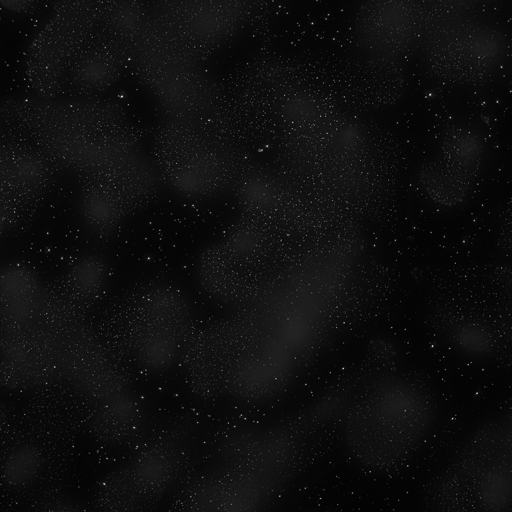

In [79]:
reader[0].shape
reader.bundle_axes = 'yx'
reader.iter_axes = 'c'
reader.default_coords['t'] = 3
reader[3]

In [89]:
import napari
v = napari.Viewer(show=True)
       # vmin=np.percentile(imgs[0],0.1),
       # vmax=np.percentile(imgs[0],99.9)
        

In [90]:
v.add_image(np.roll(reader[0],-2,axis=0),
            # rgb=True,
            contrast_limits=[np.min(reader[0]),np.max(reader[0])],
            blending='additive',
            colormap='green',
            name='PQBP1',#, is_pyramid=False
                 )
v.add_image(reader[1],         blending='additive',
        colormap='red',
        name='IN-mRuby3',#, is_pyramid=False
             )
v.add_image(reader[3], contrast_limits=[np.min(reader[3]),np.max(reader[3])],
        blending='additive',
        colormap='blue',
        name='Nono',#, is_pyramid=False
             )

<Image layer 'Nono' at 0x7f200d746450>

In [78]:
for i in range(10):
    v.add_image(np.roll(reader[0],-i,axis=0),
                # rgb=True,
                contrast_limits=[np.min(reader[0]),np.max(reader[0])],
                blending='additive',
                colormap='green',
                name='PQBP1 '+str(i),#, is_pyramid=False
                     )

In [11]:
reader.bundle_axes = 'yx'
reader.iter_axes = 'c'
# print(reader.metadata.ChannelID)
for i in range(int(reader.metadata.ChannelID(0,0))):
    print(i,reader.metadata.ChannelID(0,i))
%matplotlib qt5

ValueError: invalid literal for int() with base 10: 'Channel:0:0'

In [12]:
i=2
plt.imshow(reader[i],vmax=np.max(reader[i]),vmin=np.min(reader[i]))
reader.metadata.ChannelCount(0)
labels_img = np.zeros((reader.metadata.ChannelCount(0),)+reader.frame_shape)
labels_img.shape

(3, 1024, 1024)

In [1]:
i=2
#EMCCD
#ruby ag3
# minmass=350
#gfp
minmass=500

#sCMOS
# minmass= 300

#sCMOS
tamanho=7
#EMCCD
# tamanho=5

f = tp.locate(reader[i],tamanho,minmass=minmass,engine='numba') 
a = list(zip(f.y,f.x))
tp.annotate(f, np.roll(reader[3],-2,axis=0), imshow_style={'cmap':'gray','vmax': np.mean(reader[0])*3, 'vmin': np.min(reader[i])});
# tp.annotate(f, reader[i], imshow_style={'cmap':'gray','vmax': np.mean(reader[i])*3, 'vmin': np.min(reader[i])});
print(f)

NameError: name 'tp' is not defined

In [171]:
import sys
sys.path.insert(0,'/home/jmamede/scripts')
from support_pla import othercolor, cell_mask, multiply,  make_labels_trackpy

metadata = reader.metadata
coords = ['','','']
labels_img = np.zeros((metadata.ChannelCount(0),)+reader.frame_shape)
# coords = np.zeros((metadata.ChannelCount(0)))
list_tresholds = [600,300,300]
for i in range(metadata.ChannelCount(0)):
    labels_img[i,:,:],coords[i] = make_labels_trackpy(reader[i],mass=list_tresholds[i],size=5,_numba=True)

In [174]:
# b = tp.masks.mask_image(a,reader[i],3.5)

# plt.imshow(reader[i],cmap='gray')
# plt.imshow(b, cmap='jet', alpha=0.5)                 
coords[2]

array([[   2,  697],
       [   2,  744],
       [   3,  431],
       ...,
       [1020,  447],
       [1020,  845],
       [1020,  895]])

In [158]:
plt.imshow(labels_img[2])

In [118]:
plt.imshow(tp.masks.mask_image(f,reader[2],3))


(2044, 2048)